# PA 006 - BANK MARKETING STRATEGY

# Planing Solution (IOT)

## 0.1. Helper Functions

## Input

You have been hired as a data scientist consultant to create a data product that creates customer segmentation that will drive a marketing strategy and the expected results of your work are:

1. Create a customer segmentation based on clear selection criteria;
2. Make customer segmentation accessible to the operations team;
3. Teach the operations team how to use your solution;
4. transfer knowledge to International Bank Data Scientists;
5. Recommend 2-3 business levers for each customer segment.

## Output

-Tools: 
    -Data Description
    -Replacement of NA's

-EDA:
    -Univariate Analysis
    -Bivariate Analysis
    -outlier detection
    -feature selection
    -space study
    -Definition of Enbedding

-Machine Learning Algorithms Training:
    -performance analysis
    -clustering analysis
    -Defining clustering numbers

-EDA - Insights:
    -Explanation of the characteristics of the segments
    -Table to store the clustered clients
    -Production notebook creation

-AWS Architecture:
    -S3 to store the data
    -EC2 to store ETL and preview tool
    -DB to store the table
    -cronjob
    -papermill

## Tasks

# 0.0. Imports

In [79]:
import pandas as pd 
import seaborn as sns

from sklearn import cluster as c 
from sklearn import metrics as m 
from matplotlib import pyplot as plt

## 0.1. Helper Functions

## 0.1. Loading Data


In [6]:
df_raw = pd.read_csv("/Users/joaofmoura/Desktop/Aulinhas/Projetos/BankMarketingStrategy/CC GENERAL.csv")

# 1.0. Data Description

In [7]:
df1 = df_raw.copy()

## 1.1. Columns Rename

In [25]:
df1.columns = df1.columns.str.lower()

In [26]:
df1.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 1.1. Data Dimensions

In [27]:
print ("Number of rows: {}" .format(df1.shape[0]))
print ("Number of columns: {}" .format(df1.shape[1]))

Number of rows: 8950
Number of columns: 18


## 1.3. Data Types

In [28]:
df1.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4. Check Missing Values

In [35]:
df1.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

## 1.5. Replace Missing Values

In [50]:
# credit_limit: If the client doesn't have credit limit, the limit is 0 
df1["credit_limit"].fillna(0, inplace=True)

# minimum_payments: If the client doesn't have a minumum payment, the client payed fully
df1["minimum_payments"].fillna(0, inplace=True) 

In [51]:
df1.isna().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

## 2.0. Data Filtering

## 3.0. Feature Engineering

## 4.0. EDA - Space Study

## 5.0. Data Preparation


## 6.0. Feature Selection

In [61]:
cols_drop = ["cust_id"]
X = df1.drop(columns = cols_drop)


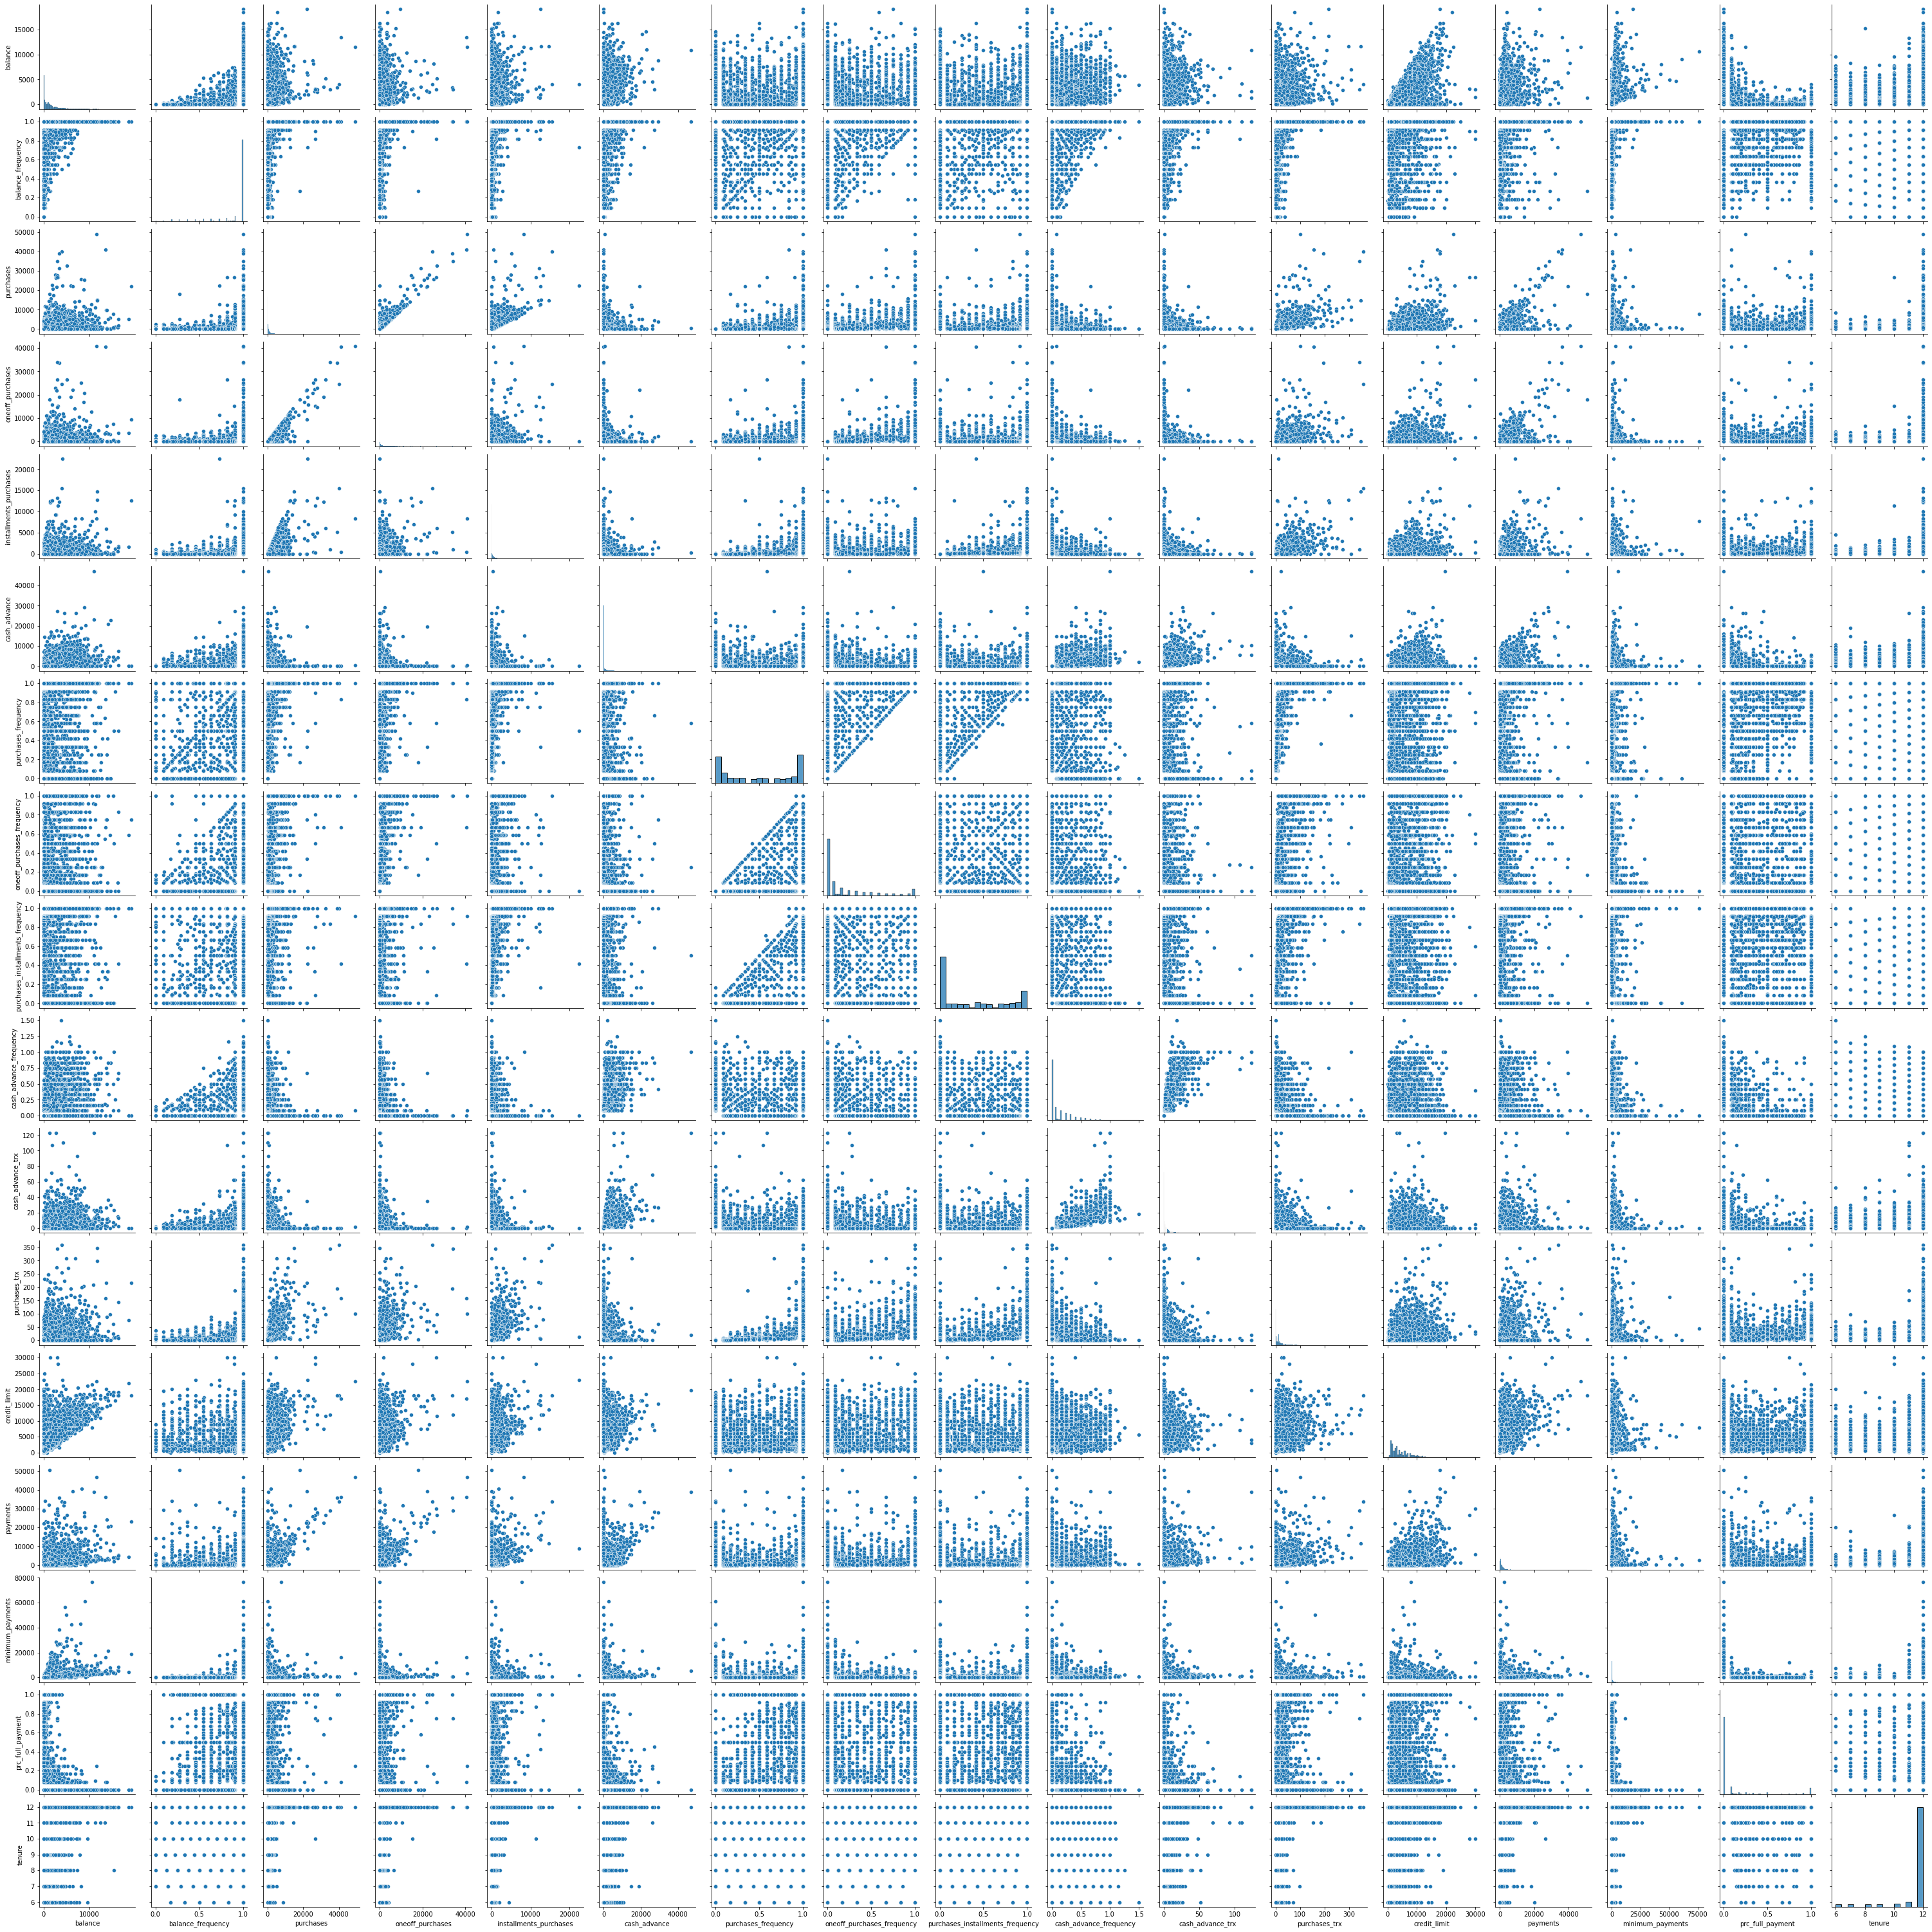

In [80]:
sns.pairplot(X)

In [54]:
x.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 7.0. Hiperparmeter Fine Tuning

## 7.1. K-Means

In [76]:
clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_list = []
davies_list = []

for k in clusters:
    # model definition
    kmeans_model = c.KMeans(n_clusters=k)

    #model training
    kmeans_model.fit(X)

    # model predict
    labels = kmeans_model.predict(X)

    # model performance
    sil = m.silhouette_score(X, labels)
    dav = m.davies_bouldin_score(X, labels)

    silhouette_list.append(sil)
    davies_list.append(dav)
  



Text(0.5, 1.0, 'Davies Boulding Index')

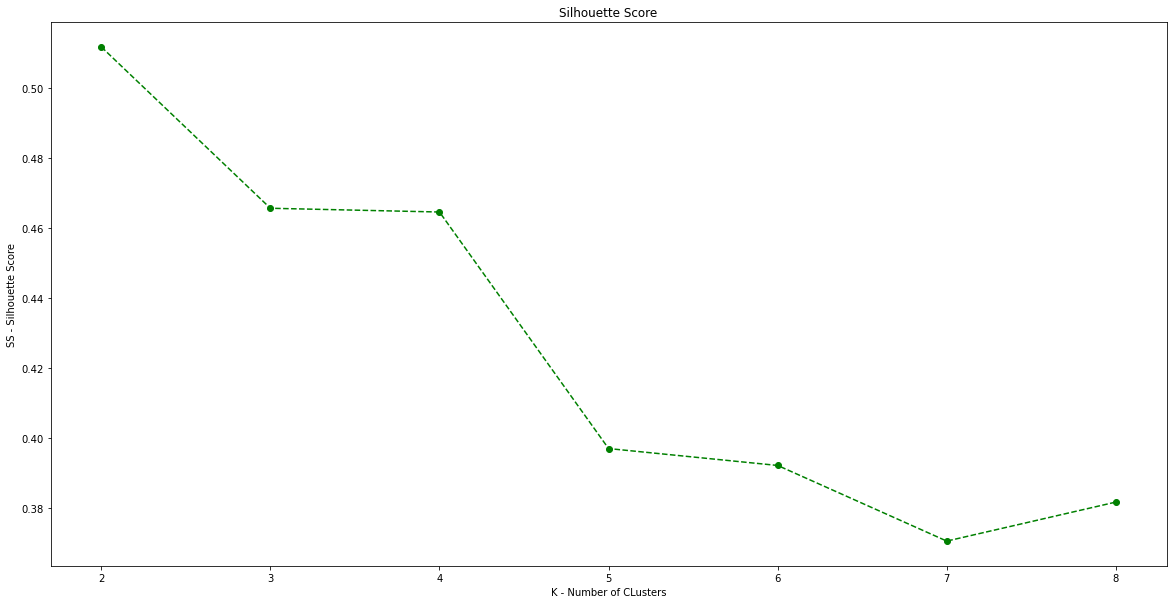

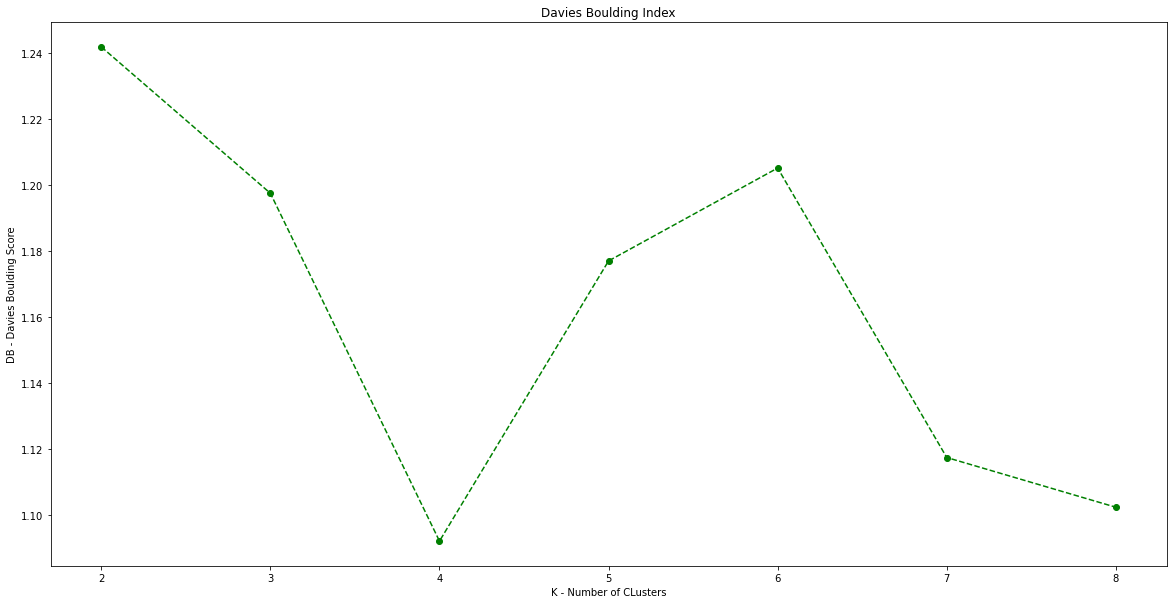

In [78]:
plt.figure(figsize=(20, 10))
plt.plot(clusters, silhouette_list, linestyle="--", marker="o", color="green")
plt.xlabel("K - Number of CLusters")
plt.ylabel("SS - Silhouette Score")
plt.title("Silhouette Score")

# Davies Boulding - the best will be with 4 clusters (closer to zero is better)
plt.figure(figsize=(20, 10))
plt.plot(clusters, davies_list, linestyle="--", marker="o", color="green")
plt.xlabel("K - Number of CLusters")
plt.ylabel("DB - Davies Boulding Score")
plt.title("Davies Boulding Index")

## 8.0. Machine Learning Training

## 9.0. Clustering Analysis

## 10.0. EDA - Insight Reports

## 11.0. Deploy to Production